In [0]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
LOG_DIR = f"{int(time.time())}" 

In [0]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

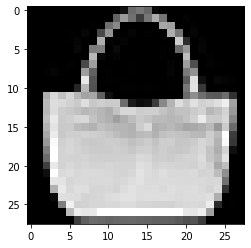

In [47]:
plt.imshow(x_train[100], cmap='gray')

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import Activation, MaxPooling2D

In [0]:
def build_model(hp):
  model = keras.models.Sequential()

  model.add(Conv2D(hp.Int("input_units",min_value=32,max_value=256,step=32),(3,3), input_shape = x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  

  for i in range(hp.Int("n_layers",1,5)):

    model.add(Conv2D(hp.Int(f"conv_{i}_units",min_value=32,max_value=256,step=32),(3,3)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2,2)))


  model.add(Flatten())
  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.compile(optimizer= "adam",
                loss= 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [0]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [51]:
#model = build_model()

#model.fit(x_train,y_train, batch_size=64, epochs=5, validation_data=(x_test,y_test),verbose=1)



tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials= 2,
    executions_per_trial=1,
    directory = LOG_DIR
)

tuner.search(x=x_train,
            y = y_train,
             epochs=10,
             batch_size=64,
             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.6291 - accuracy: 0.7911 - val_loss: 0.4380 - val_accuracy: 0.8453
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3750 - accuracy: 0.8682 - val_loss: 0.3828 - val_accuracy: 0.8595
Epoch 3/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3260 - accuracy: 0.8841 - val_loss: 0.3605 - val_accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2971 - accuracy: 0.8934 - val_loss: 0.3213 - val_accuracy: 0.8868
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2806 - accuracy: 0.8981 - val_loss: 0.3408 - val_accuracy: 0.8817
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2636 - accuracy: 0.9045 - val_loss: 0.3144 - val_accuracy: 0.8915
Epoch 7/10
60000/60000 [==========================

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.5876 - accuracy: 0.8196 - val_loss: 0.3736 - val_accuracy: 0.8626
Epoch 2/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3141 - accuracy: 0.8873 - val_loss: 0.3114 - val_accuracy: 0.8851
Epoch 3/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2786 - accuracy: 0.9005 - val_loss: 0.3028 - val_accuracy: 0.8925
Epoch 4/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2530 - accuracy: 0.9070 - val_loss: 0.3170 - val_accuracy: 0.8899
Epoch 5/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2368 - accuracy: 0.9138 - val_loss: 0.3014 - val_accuracy: 0.8926
Epoch 6/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2227 - accuracy: 0.9180 - val_loss: 0.3053 - val_accuracy: 0.8965
Epoch 7/10
60000/60000 [=====================

INFO:tensorflow:Oracle triggered exit


In [52]:
tuner.search_space_summary()

In [53]:
tuner.results_summary()

## keras-team.github.io/keras-tuner/